In this example we create an interactive plot for the complexity $C$ as a function of the tightness $\tau$. The plot will have sliders for $\Delta$ and $a_\rm{root}$.

In [15]:
from pattern_walker.mean_field import overlap_MF_patternWalker as pw
from pattern_walker.utils import balanced_ditree,filter_nodes #(1) c-ary tree with edges pointing away from root
import numpy as np
import ipywidgets
import matplotlib as mpl
import matplotlib.pyplot as plt

In [82]:
#For nice plot layouts. To me moved to plot stylesheet
rc_fonts = {
    "text.usetex": True,
    'text.latex.preview': True, # Gives correct legend alignment.
    'mathtext.default': 'regular',
    'text.latex.preamble': [r"""\usepackage{bm,amsfonts}"""],
}
mpl.rcParams.update(rc_fonts)

#plot style and size
plt.style.use(['ggplot','seaborn-paper'])
mpl.rcParams['figure.figsize']=[6,4.5]

We begin by setting the model parameters. $c$ and $h$ define the hierarchy -- the $c$-ary tree of height $h$. The remaining parameters relate to the patterns on that tree. *Note*: If we are looking at single realisations, it is best to choose extreme values (such as a_root=1, Gamma=Gamma_root=0) to obtain helpful visualisations

In [88]:
c=3 #number of Parts (coordination number of tree)
h=4 #height of tree (shortest distance between root and any leaf)
L=48 #number of bits to a pattern (length of glossary)
a_root=0.3 #expectation of root bits
Gamma_root=0.3 #noise on Act(root)-level 
Gamma=0.2 #noise below Part-level
tau=(1-Gamma)**(h-1)
a_high=(1-a_root)*Gamma_root+a_root #expectation of Part-specific bits
a_low=(1-a_root)*Gamma_root+a_root/10 #expectation of Part-generic bits
Delta=0 #overlap between Parts

Make a rooted $c$-ary tree. 

In [85]:
tree,root = balanced_ditree(c,h)

To compute $C$ for a given set of parameters, we can (expensively) create an instance of a Mean-Field Walker (above importet as pw) for these parameters and return the output of its method MF_mfpt.

In [89]:
# Walker=pw(tree, root, L, a_root, a_low, a_high, Delta, Gamma, Gamma_root)
def comp(tau=tau,Delta=Delta,a_root=a_root):
    Gamma=1-np.power(tau,1/(h-1))
    a_high=(1-a_root)*Gamma_root+a_root
    a_low=(1-a_root)*Gamma_root+a_root/10
    return pw(c,h,tree, root, L, a_root, a_low, a_high, Delta, Gamma, Gamma_root).MF_mfpt()
comp=np.vectorize(comp) #convenient for evaluating comp on an array of values for tau.

Make interactive plot using Ipywidgets

<IPython.core.display.Javascript object>


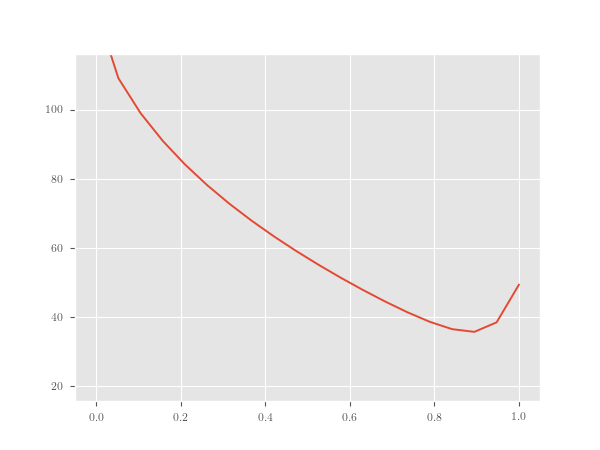

interactive(children=(IntSlider(value=0, description='Delta', max=16), FloatSlider(value=0.5, description='a_r…

In [87]:
%matplotlib notebook
x=np.linspace(0,1,20)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
line, = ax.plot( x,comp(x,0,0.))
def update(Delta=ipywidgets.IntSlider(min=0,max=int(L*(c-1)/(2*c)),step=1),a_root=(0.,1.)):
    line.set_ydata( comp(x,Delta,a_root) )
    plt.show()

ipywidgets.interact(update);